In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
usdt_ticker = yf.Ticker("USDT-USD")
csv_file = "usdt.csv"

# Check if the CSV file exists and delete it if it does
if os.path.exists(csv_file):
    os.remove(csv_file)

# Fetch the historical data for Tether (USDT)
usdt = usdt_ticker.history(period="max")
usdt.to_csv(csv_file)

# Load the data from the CSV file into a DataFrame
usdt = pd.read_csv(csv_file, index_col=0)
usdt

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,1.010870,1.013270,0.996515,1.008180,358188000,0.0,0.0
2017-11-10 00:00:00+00:00,1.006500,1.024230,0.995486,1.006010,756446016,0.0,0.0
2017-11-11 00:00:00+00:00,1.005980,1.026210,0.995799,1.008990,746227968,0.0,0.0
2017-11-12 00:00:00+00:00,1.006020,1.105910,0.967601,1.012470,1466060032,0.0,0.0
2017-11-13 00:00:00+00:00,1.004480,1.029290,0.975103,1.009350,767884032,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-14 00:00:00+00:00,0.999672,1.000201,0.999006,0.999471,56734383862,0.0,0.0
2024-06-15 00:00:00+00:00,0.999463,1.000000,0.999205,0.999467,35823242153,0.0,0.0
2024-06-16 00:00:00+00:00,0.999438,1.000105,0.999039,0.999293,31962850043,0.0,0.0


<Axes: xlabel='Date'>

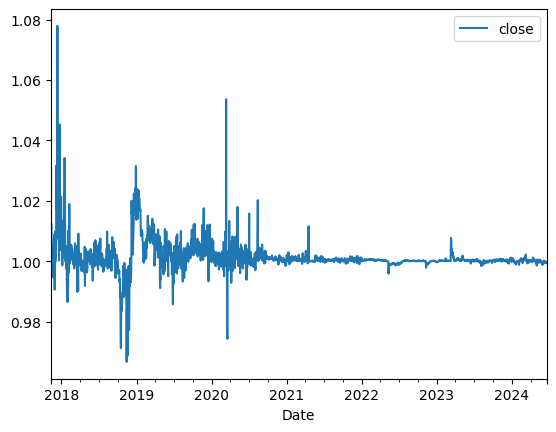

In [3]:
# Convert index to datetime
usdt.index = pd.to_datetime(usdt.index)

# Remove unnecessary columns
del usdt["Dividends"]
del usdt["Stock Splits"]

# Convert column names to lowercase
usdt.columns = [c.lower() for c in usdt.columns]

# Plot the closing price
usdt.plot.line(y="close", use_index=True)

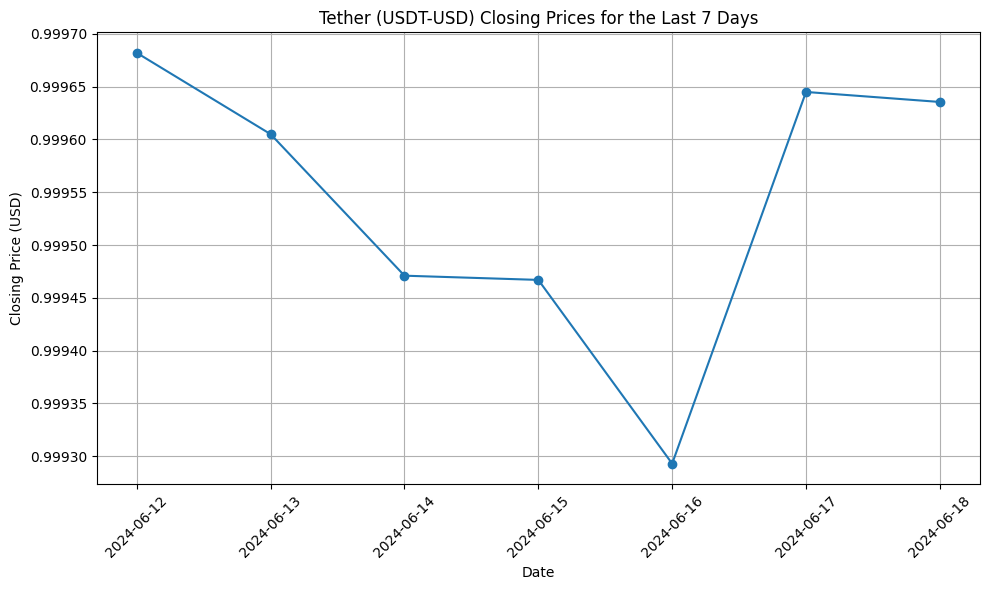

In [4]:
# Filter the data for the last seven days
last_seven_days_usdt = usdt[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_usdt.index, last_seven_days_usdt['close'], marker='o')
plt.title('Tether (USDT-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
wiki = pd.read_csv("tether_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2018-02-13,3.166667,-0.238520,0.596111
2018-02-18,2.733333,-0.273916,0.613889
2018-02-21,2.766667,-0.306809,0.630556
2018-02-24,2.833333,-0.301698,0.630556
2018-02-25,2.833333,-0.302900,0.630556
...,...,...,...
2024-05-14,2.066667,-0.271010,0.622222
2024-05-20,2.100000,-0.326122,0.655556
2024-06-09,2.200000,-0.309287,0.647222
2024-06-12,2.266667,-0.353349,0.669444


In [6]:
# Assuming 'usdt' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
usdt = usdt.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
usdt["tomorrow"] = usdt["close"].shift(-1)
usdt["target"] = (usdt["tomorrow"] > usdt["close"]).astype(int)
usdt["target"].value_counts()


target
1    159
0    152
Name: count, dtype: int64

In [7]:
usdt

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2018-02-13 00:00:00+00:00,1.000800,1.008650,0.995931,1.001100,2226759936,3.166667,-0.238520,0.596111,1.005190,1
2018-02-18 00:00:00+00:00,1.004680,1.016190,0.998832,1.005190,3124179968,2.733333,-0.273916,0.613889,1.000970,0
2018-02-21 00:00:00+00:00,1.005360,1.010390,0.988699,1.000970,3459830016,2.766667,-0.306809,0.630556,1.002840,1
2018-02-24 00:00:00+00:00,1.001140,1.014000,0.993887,1.002840,2417710080,2.833333,-0.301698,0.630556,1.000340,0
2018-02-25 00:00:00+00:00,1.004790,1.009000,0.996229,1.000340,1968850048,2.833333,-0.302900,0.630556,0.999561,0
...,...,...,...,...,...,...,...,...,...,...
2024-05-14 00:00:00+00:00,0.999840,1.001147,0.999062,0.999592,57380795961,2.066667,-0.271010,0.622222,1.000098,1
2024-05-20 00:00:00+00:00,0.999912,1.001219,0.999473,1.000098,86442004708,2.100000,-0.326122,0.655556,0.999904,0
2024-06-09 00:00:00+00:00,0.999823,1.000197,0.999719,0.999904,38460275023,2.200000,-0.309287,0.647222,0.999682,0
2024-06-12 00:00:00+00:00,0.999940,1.000440,0.999488,0.999682,67692265125,2.266667,-0.353349,0.669444,0.999293,0


In [8]:
usdt.to_csv('usdtSentimet.csv')